# 고속열차 여객 수송자료 

교통 분야는 빅데이터 분석이 가장 활발하게 진행되는 분야이다. 

자동차, 항공기, 기차 등 다양한 교통 수단들은 상상할 수 없는 데이터를 생성하고 있다. 최근에는 자동차 네비게이션의 발달로 수 많은 차들의 결로가 실시가능로 저장되고 있다. 또한 열차와 항공기 같은 여객 산업에서도 고개의 예약, 결제 등 이용 현황에 대한 자료가 효율적인 자원 배분과 수익관리에 사용된다. 

열차는 항공기외는 다르게 출발역과 도착역 사이에 다수의 중간 정차역이 존재한다. 따라서 열차를 운행하는 경우 여행 경로에 따른 승객의 수요 예측과 죄석의 합리적인  배정이 중요하다. 

예를 들어 KTX 고속 열차의 노선 중에 서울에서 출발하여 부산에 도착하는 경부 하행선 열차가 하루에 60회 정도 운행한다. 중간 정차역이 적게는 5개, 많게는 8개인 것을 고려하면 여행 경로의 수는 상당히 많다. 그리고 운행하는 요일, 계절, 명절에 따라 수요가 다르므로 여객의 수요를 예측하고 좌석을 배정하는 작업은 매우 까다로운 작업이다. 더 나아가 경부선만 아닌 전라선, 영동선과 같은 다른 노선이 매일 운행하고 있고 상행/하행 두 노선을 모두 고려하면 상당한 빅데이터가 처리되고 분석되어야 한다.  


![ktx](../../images/ktx.png)

이 예제에서는 한 달 동안 운행한 고속 열차에 탑승한 승객의 수송자료를 처리하고 기초적인 분석을 하는 예를 살펴 보기로 한다.


분석의 목표는 여행 구간마다 요일별 탑긍객 수가 어떤 패턴을 가지는 지 알아보는 것이다.   
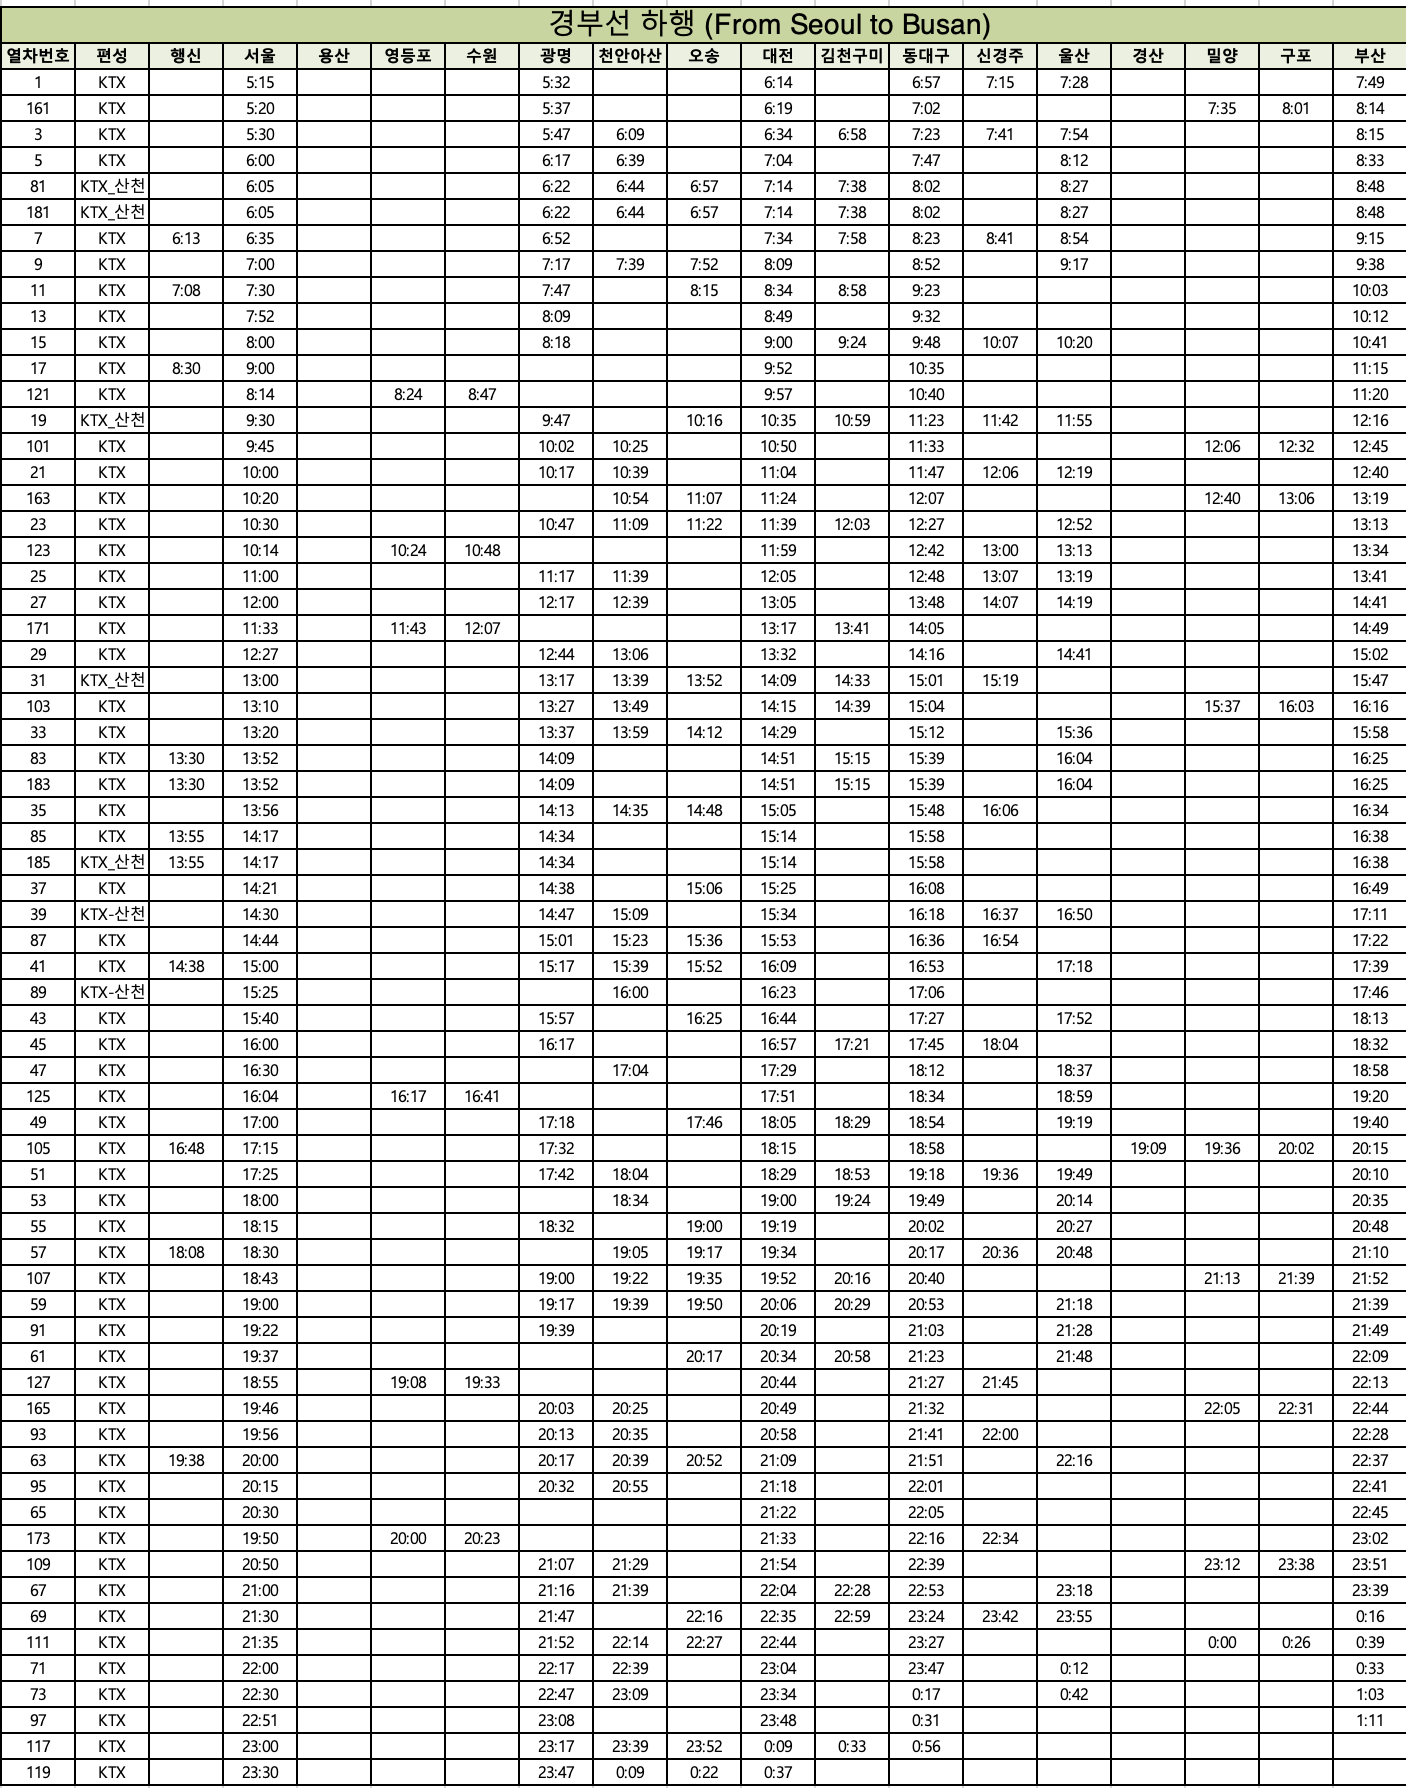

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc
#import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [28]:
import pandas as pd

## 고속열차 수송 자료

고속 열차에 탑승한 승객에 대한 자료는 csv(comma-separated values) 형식으로 저장되어 있다. csv 화일의 각 열에 대한 이름과 설명은 다음과 같다.

- `TRAIN_NO`: 열차 번호
- `DATE` : 운행 일자
- `STATION_START`: 출발역
- `STATION_ARRV` : 도착역
- `NUM_PASSENGER` : 탐승객 수

`pandas` 라이브러리의 `read_csv()` 함수를 사용하면 csv 화일의 자료를 데이터프레임으로 만들어 수 있다.

In [29]:
train_raw_data = pd.read_csv("/Users/ylee19067/Dropbox/project/teaching/bigdata/textbook/book/data/train-data-01.csv")

In [30]:
train_raw_data

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
0,2,20190701,서울,대전,106.0
1,2,20190702,서울,대전,113.0
2,2,20190703,서울,대전,146.0
3,2,20190704,서울,대전,84.0
4,2,20190705,서울,대전,105.0
...,...,...,...,...,...
1764,6,20190726,울산,부산,10.0
1765,6,20190727,울산,부산,6.0
1766,6,20190728,울산,부산,21.0
1767,6,20190729,울산,부산,12.0


### 운행 열차의 수

In [31]:
num_train = train_raw_data['TRAIN_NO'].unique()
num_train

array([2, 5, 6])

### 날짜 변수 생성

In [32]:
train_raw_data['DATE2'] = pd.to_datetime(train_raw_data['DATE'], format='%Y%m%d')

In [33]:
train_raw_data

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER,DATE2
0,2,20190701,서울,대전,106.0,2019-07-01
1,2,20190702,서울,대전,113.0,2019-07-02
2,2,20190703,서울,대전,146.0,2019-07-03
3,2,20190704,서울,대전,84.0,2019-07-04
4,2,20190705,서울,대전,105.0,2019-07-05
...,...,...,...,...,...,...
1764,6,20190726,울산,부산,10.0,2019-07-26
1765,6,20190727,울산,부산,6.0,2019-07-27
1766,6,20190728,울산,부산,21.0,2019-07-28
1767,6,20190729,울산,부산,12.0,2019-07-29


In [34]:
train_raw_data.dtypes

TRAIN_NO                   int64
DATE                       int64
STATION_DEPART            object
STATION_ARRV              object
NUM_PASSENGER            float64
DATE2             datetime64[ns]
dtype: object

### 요일 변수 생성

`dayofweek` 메소드는 날짜에서 요일을 구해준다.  월요일이 0, 화요일이 1, 그라고 일요일이 6 으로 코딩된다.

In [35]:
train_raw_data['DAYOFWEEK'] =  train_raw_data['DATE2'].dt.dayofweek

In [36]:
train_raw_data

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER,DATE2,DAYOFWEEK
0,2,20190701,서울,대전,106.0,2019-07-01,0
1,2,20190702,서울,대전,113.0,2019-07-02,1
2,2,20190703,서울,대전,146.0,2019-07-03,2
3,2,20190704,서울,대전,84.0,2019-07-04,3
4,2,20190705,서울,대전,105.0,2019-07-05,4
...,...,...,...,...,...,...,...
1764,6,20190726,울산,부산,10.0,2019-07-26,4
1765,6,20190727,울산,부산,6.0,2019-07-27,5
1766,6,20190728,울산,부산,21.0,2019-07-28,6
1767,6,20190729,울산,부산,12.0,2019-07-29,0


### 여행 구간별 그룹화

In [37]:
train_data = train_raw_data[ [ 'STATION_DEPART', 'STATION_ARRV','DAYOFWEEK','NUM_PASSENGER']]

In [38]:
train_data 

,STATION_DEPART,STATION_ARRV,DAYOFWEEK,NUM_PASSENGER
0,서울,대전,0,106.0
1,서울,대전,1,113.0
2,서울,대전,2,146.0
3,서울,대전,3,84.0
4,서울,대전,4,105.0
...,...,...,...,...
1764,울산,부산,4,10.0
1765,울산,부산,5,6.0
1766,울산,부산,6,21.0
1767,울산,부산,0,12.0


### 여행 구간별, 요일별 평균 탑승자수 계산 

In [39]:
summary_data = train_data.groupby(['STATION_DEPART','STATION_ARRV','DAYOFWEEK']).mean()
summary_data 

NUM_PASSENGER
STATION_DEPART STATION_ARRV DAYOFWEEK               
광명             대전           0                 16.300
                            1                 15.200
                            2                 20.750
                            3                 21.125
                            4                 18.125
...                                              ...
행신             서울           2                 12.750
                            3                 10.000
                            4                  8.250
                            5                  7.500
                            6                  5.000

[224 rows x 1 columns]

### 요약 자료 정리

In [40]:
summary_data.reset_index(inplace=True)
summary_data

,STATION_DEPART,STATION_ARRV,DAYOFWEEK,NUM_PASSENGER
0,광명,대전,0,16.300
1,광명,대전,1,15.200
2,광명,대전,2,20.750
3,광명,대전,3,21.125
4,광명,대전,4,18.125
...,...,...,...,...
219,행신,서울,2,12.750
220,행신,서울,3,10.000
221,행신,서울,4,8.250
222,행신,서울,5,7.500


In [41]:
summary_data['OD'] = summary_data['STATION_DEPART'] + '-' + summary_data['STATION_ARRV'] 

In [42]:
summary_od = summary_data[['OD', 'DAYOFWEEK','NUM_PASSENGER']]
summary_od

,OD,DAYOFWEEK,NUM_PASSENGER
0,광명-대전,0,16.300
1,광명-대전,1,15.200
2,광명-대전,2,20.750
3,광명-대전,3,21.125
4,광명-대전,4,18.125
...,...,...,...
219,행신-서울,2,12.750
220,행신-서울,3,10.000
221,행신-서울,4,8.250
222,행신-서울,5,7.500


In [43]:
summary_od['OD'].unique()

array(['광명-대전', '광명-동대구', '광명-부산', '광명-오송', '광명-울산', '광명-천안아산', '대전-동대구',
       '대전-부산', '대전-울산', '동대구-부산', '동대구-울산', '서울-광명', '서울-대전', '서울-동대구',
       '서울-부산', '서울-오송', '서울-울산', '서울-천안아산', '오송-대전', '오송-동대구', '오송-부산',
       '오송-울산', '울산-부산', '천안아산-대전', '천안아산-동대구', '천안아산-부산', '천안아산-오송',
       '천안아산-울산', '행신-대전', '행신-동대구', '행신-부산', '행신-서울'], dtype=object)

### 선택구간에서의  요일별 평균 탑승자수

In [44]:
one_od_1 = summary_od[ summary_od['OD'] == '서울-부산']
one_od_1

,OD,DAYOFWEEK,NUM_PASSENGER
98,서울-부산,0,284.800000
99,서울-부산,1,284.266667
100,서울-부산,2,287.833333
101,서울-부산,3,319.500000
102,서울-부산,4,353.833333
103,서울-부산,5,311.166667
104,서울-부산,6,265.083333


<AxesSubplot:xlabel='DAYOFWEEK'>

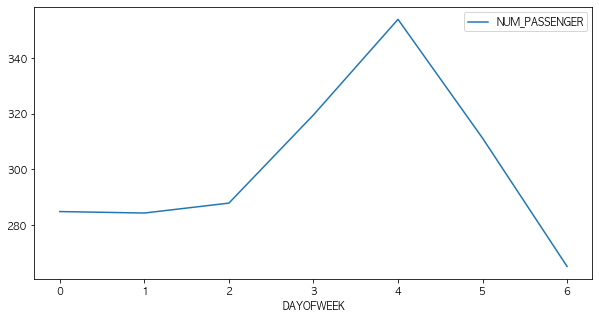

In [45]:
one_od_1.plot(x='DAYOFWEEK', y="NUM_PASSENGER")

In [46]:
one_od_2 = summary_od[summary_od['OD'] == '서울-광명']
one_od_2

,OD,DAYOFWEEK,NUM_PASSENGER
77,서울-광명,0,7.700
78,서울-광명,1,10.200
79,서울-광명,2,9.625
80,서울-광명,3,9.000
81,서울-광명,4,16.375
82,서울-광명,5,9.250
83,서울-광명,6,6.625


<AxesSubplot:xlabel='DAYOFWEEK'>

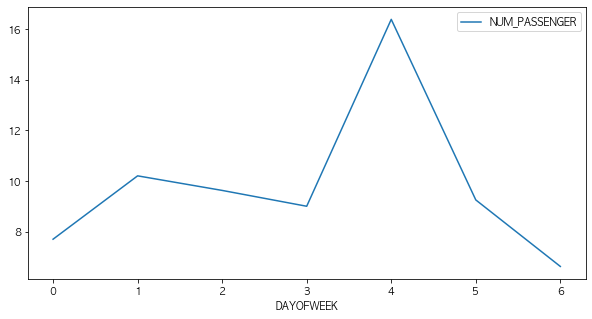

In [47]:
one_od_2.plot(x='DAYOFWEEK', y="NUM_PASSENGER")

### 3개의 여행구간에 대한 요일별 추세

In [48]:
summary_od_3 = summary_od[summary_od['OD'].isin(["서울-부산", "서울-대전", "서울-동대구"])]
summary_od_3

,OD,DAYOFWEEK,NUM_PASSENGER
84,서울-대전,0,99.266667
85,서울-대전,1,112.933333
86,서울-대전,2,117.500000
87,서울-대전,3,120.500000
88,서울-대전,4,99.583333
89,서울-대전,5,102.250000
90,서울-대전,6,102.750000
91,서울-동대구,0,111.133333
92,서울-동대구,1,135.066667
93,서울-동대구,2,137.583333


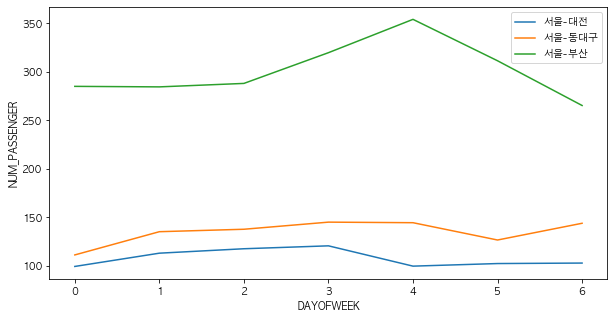

In [49]:
fig,ax = plt.subplots()

for name in summary_od_3['OD'].unique():
    ax.plot(summary_od_3[summary_od_3['OD']==name].DAYOFWEEK, summary_od_3[summary_od_3['OD']==name].NUM_PASSENGER,label=name)

ax.set_xlabel("DAYOFWEEK")
ax.set_ylabel("NUM_PASSENGER")
ax.legend(loc='best')

### 모든 여행구간에 대한 요일별 추세

Text(0, 0.5, 'NUM_PASSENGER')

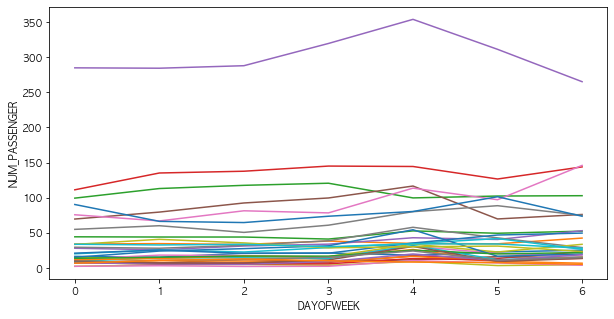

In [50]:
fig,ax = plt.subplots()

for name in summary_od['OD'].unique():
    ax.plot(summary_od[summary_od['OD']==name].DAYOFWEEK, summary_od[summary_od['OD']==name].NUM_PASSENGER,label=name)

ax.set_xlabel("DAYOFWEEK")
ax.set_ylabel("NUM_PASSENGER")

### 서울-부산을 제외한  여행구간에 대한 요일별 추세

In [51]:
summary_od_A = summary_od[  summary_od['OD'] != "서울-부산" ]
summary_od_A

,OD,DAYOFWEEK,NUM_PASSENGER
0,광명-대전,0,16.300
1,광명-대전,1,15.200
2,광명-대전,2,20.750
3,광명-대전,3,21.125
4,광명-대전,4,18.125
...,...,...,...
219,행신-서울,2,12.750
220,행신-서울,3,10.000
221,행신-서울,4,8.250
222,행신-서울,5,7.500


Text(0, 0.5, 'NUM_PASSENGER')

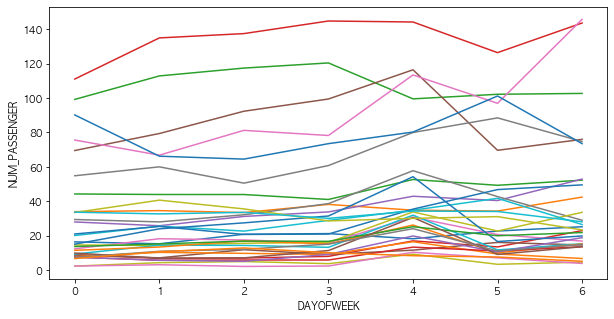

In [52]:
fig,ax = plt.subplots()

for name in summary_od['OD'].unique():
    ax.plot(summary_od_A[summary_od_A['OD']==name].DAYOFWEEK, summary_od_A[summary_od_A['OD']==name].NUM_PASSENGER,label=name)

ax.set_xlabel("DAYOFWEEK")
ax.set_ylabel("NUM_PASSENGER")